# Моделирование 2


### Задание

Электрон влетает в цилиндрический конденсатор с начальной скоростью $V$, посередине между обкладками, параллельно образующим цилиндра.

- Построить графики зависимости $y(x)$, $V_y(t)$, $a_y(t)$, $y(t)$. Координатные оси направлены как показано на рисунке.
- Рассчитать время полета $t$ и конечную скорость электрона $V_{кон}$.
- При какой минимальной разности потенциалов, приложенной к обкладкам, электрон не успеет вылететь из конденсатора. Краевыми эффектами пренебречь.

<p align="center">
  <img src="1.png" style="height: 200px;"/>
</p>

Начальные значения:


$ r = 3.5cm, \\ $
$ m = 9.1 \cdot 10^{-31}, \\ $
$ q = -1.6 \cdot 10^{-19}, \\ $
$ R = 8cm, \\ $
$ L = 16cm, \\ $
$ V_0 = 6.5cm \cdot 10^6 м/с \\ $


$$


In [59]:
import matplotlib.pyplot as plt
import math
import numpy

# constants
e = -1.6 * (10 ** -19)      # C
m = 9.1 * (10 ** -31)       # kg

# variables
R = 8 / 100                 # m
r = 3.5 / 100               # m
L = 16 / 100                # m
vx0 = 6.5 * pow(10, 6)      # m / s


Можем найти время прохождения длинны конденсатора по формуле 
$$
t_{max} = \frac{L}{V_0}
$$
По II закону Ньютона
$$
F = m\cdot a \\
a = \frac{F}{m} \\
F = e \cdot E \\
a = \frac{eE}{m}
$$
$E$ можно найти по
$$
E = \frac{\lambda}{2\pi\varepsilon_0r} \\
U = - \int E \cdot dr \\
U = - \int_{r}^{R}\frac{\lambda}{2\pi\varepsilon_0r}dr = - \frac{\lambda}{2\pi\varepsilon_0}\ln{\frac{R}{r}}  \\

\lambda = - \frac{2\pi\varepsilon_0U}{ \ln{R/r}} \\

E = \frac{U}{r ln (R/r)} \\
a = \frac{eU}{mr\ln{\frac{R}{r}}} \\
$$

In [60]:
tmax = L / vx0
ln = math.log(R / r)
y, vy, a = 0, 0, 0
ul, ur = 0, 1000
p = 9
t = 10 ** -p

def next_vy(v_, a_):
    return v_ + a_ * t

def next_a(u_, y_):
    return (u_ * e) / (m * y_ * ln)

def next_y(y_, v_, a_):
    return y_ + v_ * t + a_ * t * t / 2


Бин поиском, найдём минимальную разницу потэнциалов при котором частица не вылитит из конденсатора.

In [61]:
# code
while ur - ul > (10 ** -6):
    um = (ur + ul) / 2
    y = (R + r) / 2
    vy = 0
    a = next_a(um, y)
    exited = False
    for i in range(1, int(tmax * (10 ** p))):
        y = next_y(y, vy, a)
        vy = next_vy(vy, a)
        a = next_a(um, y)
        if y < r or y > R:
            exited = True
            break

    if exited:
        ur = um
    else:
        ul = um

print('{:25s}'.format("Required voltage:"), "%.10f" % ur)
v = (math.sqrt(vx0 ** 2 + vy ** 2))
print('{:25s}'.format("Speed:"), "%.10f" % v)
print('{:25s}'.format("Time:"), "%.10f" % tmax)

Required voltage:         21.5378031135
Speed:                    6835446.1882978864
Time:                     0.0000000246


Теперь, с новыми данными мы можем промоделировать путь частицы сквозь конденсатор и составить нужные графики.

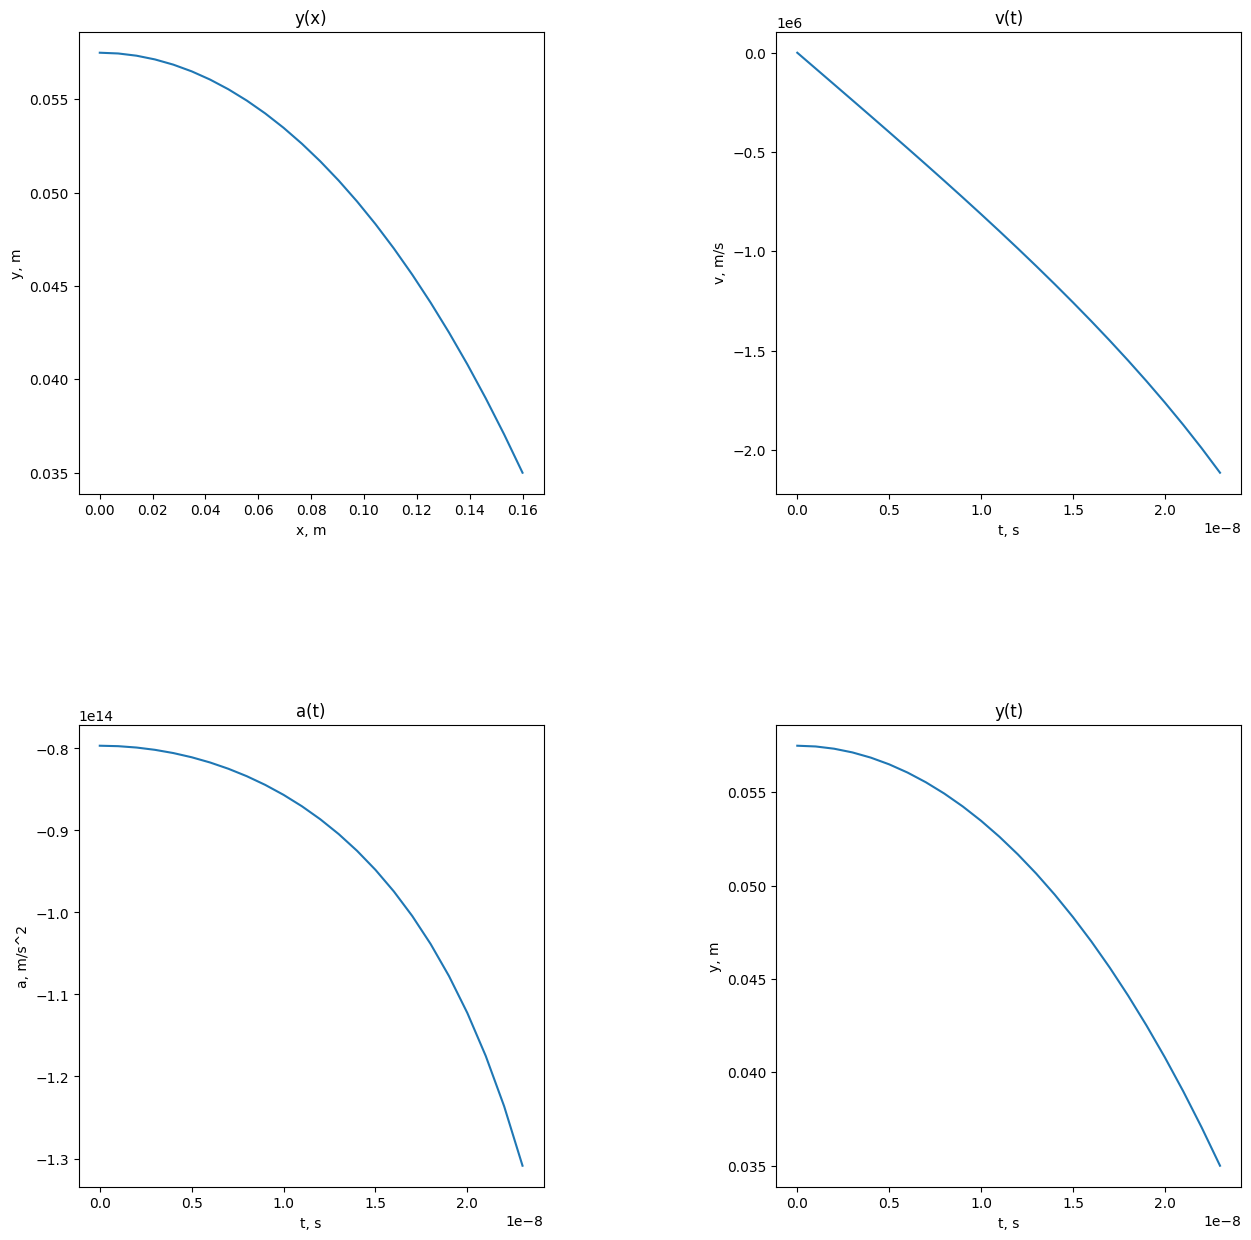

In [62]:
y = (R + r) / 2
vy = 0
a = next_a(ur, y)
totalY = [y]
totalV = [vy]
totalA = [a]
totalT = [0]
totalX = numpy.linspace(0, L, int(tmax * (10 ** p)))

for i in range(1, int(tmax * (10 ** p))):
    y = next_y(y, vy, a)
    vy = next_vy(vy, a)
    a = next_a(ur, y)
    totalY.append(y)
    totalV.append(vy)
    totalA.append(a)
    totalT.append(i * (10 ** -p))

figure = plt.figure(figsize=(15, 15))
plt.subplots_adjust(wspace=0.5, hspace=0.5)

plot1 = figure.add_subplot(2, 2, 1)
plot1.set_title("y(x)")
plot1.set_xlabel("x, m")
plot1.set_ylabel("y, m")
plot1.plot(totalX, totalY)

plot2 = figure.add_subplot(2, 2, 2)
plot2.set_title("v(t)")
plot2.set_xlabel("t, s")
plot2.set_ylabel("v, m/s")
plot2.plot(totalT, totalV)

plot3 = figure.add_subplot(2, 2, 3)
plot3.set_title("a(t)")
plot3.set_xlabel("t, s")
plot3.set_ylabel("a, m/s^2")
plot3.plot(totalT, totalA)

plot4 = figure.add_subplot(2, 2, 4)
plot4.set_title("y(t)")
plot4.set_xlabel("t, s")
plot4.set_ylabel("y, m")
plot4.plot(totalT, totalY)

plt.show()